In [19]:
import numpy as np
from utils import image_process, camera_calibration, controller
from matplotlib import pyplot as plt
import cv2


In [20]:
from pypylon import pylon

In [21]:
from pypylon import pylon

# 创建一个相机对象
camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())

# 打开相机
camera.Open()

# 设置相机参数，例如曝光时间
camera.ExposureTime.SetValue(20000)

# 开始采集
camera.StartGrabbing()

# 创建一个图像处理器
converter = pylon.ImageFormatConverter()

# 设置图像处理参数
converter.OutputPixelFormat = pylon.PixelType_Mono8
converter.OutputBitAlignment = pylon.OutputBitAlignment_MsbAligned

# 循环获取图像
while camera.IsGrabbing():
    grabResult = camera.RetrieveResult(5000, pylon.TimeoutHandling_ThrowException)

    if grabResult.GrabSucceeded():
        # 转换图像格式
        image = converter.Convert(grabResult)
        img = image.GetArray()
        # 这里可以对图像进行处理，例如保存为文件
        cv2.imwrite('image.png', img)

# 停止采集
camera.StopGrabbing()

# 关闭相机
camera.Close()

RuntimeException: No device is available or no device contains the provided device info properties. : RuntimeException thrown (file 'tlfactory.cpp', line 694)

In [2]:
w = 240
h = 170
img_processor = image_process.ImageProcessor(w, h)
images = img_processor.load_images("src/")


In [14]:
# img_processor.display_images(images)

In [4]:
kalibrierung_files = img_processor.load_images("kalibrierung/")
# img_processor.display_images(kalibrierung_files)

In [5]:
mtx, dist, newcameramtx = camera_calibration.calibrator(27)

In [7]:
# x,y,cam = camera_calibration.para_stu(len(kalibrierung_files))

In [8]:
corrected_images = camera_calibration.correct_distortion(images, mtx, dist, newcameramtx)

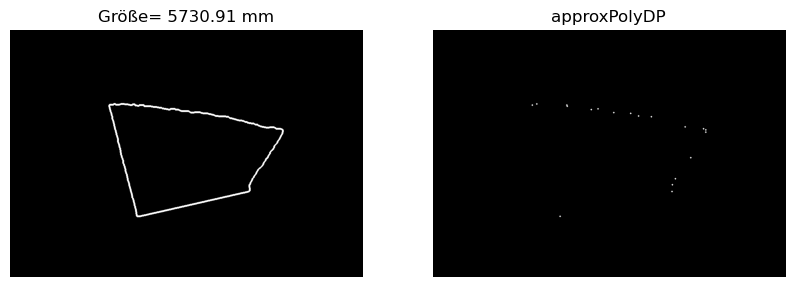

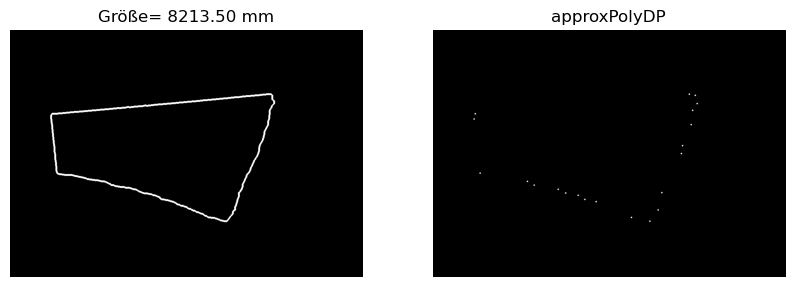

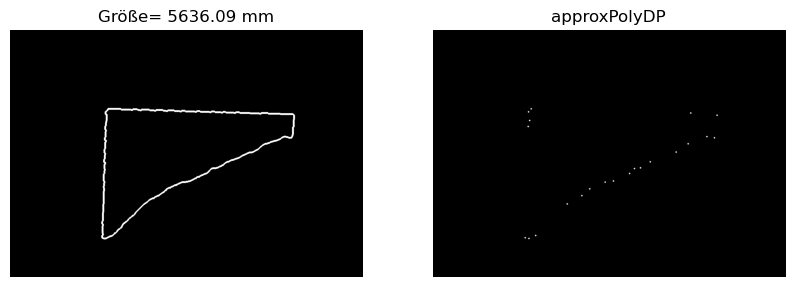

In [9]:

scale = 4

con_list = img_processor.contour_for_robot(corrected_images, scale)

In [10]:
# con_list = []
# for i in range(len(corrected_images)):

#     c_img = img_processor.preprocess(corrected_images[i])
#     imgcon, cons, maxArea = img_processor.bounding_rect(c_img, filter)
#     maxbox = cons[0][2]
#     img_processor.reorder(maxbox)
#     w_img = img_processor.warp_img(corrected_images[i], maxbox, w, h)
    
#     w1_img = cv2.medianBlur(w_img,5)
#     w2_img = cv2.bilateralFilter(w1_img, d = 50, sigmaColor= 10, sigmaSpace= 50)

#     k2_img = img_processor.kmeans(w2_img, 3)

#     c2_img = cv2.Canny(k2_img,100,110)
#     kernel = np.ones((5,5))
#     c2_img = cv2.dilate(c2_img,kernel,iterations=2) #dilatieren
#     c2_img = cv2.erode(c2_img,kernel,iterations=1) #erodieren

#     # display contours and aprroximate contours
#     # contour
#     con, area = img_processor.find_internal_conturs(c2_img, 1000, scale) # arguments: image, threshold, scale
#     fig=plt.figure(figsize=(10, 10))
#     fig.add_subplot(1, 2, 1)
#     img_processor.display_contour(c2_img, con, area)

#     con2 = img_processor.approx_contour(con)
#     # aprroximate contour
#     fig.add_subplot(1, 2, 2)
#     img_processor.dispaly_approx_contour(c2_img, con2)
#     plt.show()

#     # final point contour
#     con_list.append(con2)


con = con_list[1] # size 3 dimension [[[]]]
# con = np.squeeze(con, axis=1) # size 2 dimension [[]]
print(con)
con = [ele/scale/1000 for ele in con]


[[698 176]
 [703 198]
 [691 216]
 [687 254]
 [664 310]
 [661 331]
 [609 435]
 [599 481]
 [577 511]
 [528 501]
 [434 459]
 [404 453]
 [386 442]
 [353 436]
 [333 426]
 [269 415]
 [251 405]
 [125 383]
 [109 239]
 [112 225]
 [682 173]]


In [12]:
robot_controller = controller.RobotController(0,0,0.08)
.robot_controller.initialize(2) # payload 2

SyntaxError: invalid syntax (1866328842.py, line 2)

In [ ]:
robot_controller.start_pos() # Default position

NameError: name 'robot_controller' is not defined

In [ ]:
path = robot_controller.transformation(con)
robot_controller.move_to(path)